In [292]:
#Titanic Machine Learning challenge

#https://realpython.com/logistic-regression-python/

#Logistic regression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.impute import SimpleImputer #For imputing missing values

from numpy import inf

#https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

from sklearn.dummy import DummyClassifier

#Load calibration and validation datasets
df_prep = pd.read_csv("D:\\Datasets\\Titanic Machine Learning from Disaster\\kaggle datasets\\train_prep.csv")
cali = pd.read_csv("D:\\Datasets\\Titanic Machine Learning from Disaster\\kaggle datasets\\cali.csv")
vali = pd.read_csv("D:\\Datasets\\Titanic Machine Learning from Disaster\\kaggle datasets\\vali.csv")
df_test = pd.read_csv("D:\\Datasets\\Titanic Machine Learning from Disaster\\kaggle datasets\\test.csv")

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [293]:
#Load variables into numpy arrays

y = cali["Survived"].to_numpy()
x1 = cali["Sex"].to_numpy()
x2 = cali["Age"].to_numpy()
x3 = cali["1st_class"].to_numpy()
x4 = cali["2nd_class"].to_numpy()
x5 = cali["Fare"].to_numpy()
x6 = cali["Kid"].to_numpy()
x7 = cali["kid_siblings"].to_numpy()
x8 = cali["fare_tran"].to_numpy()
x9 = cali["Pclass"].to_numpy()
x10 = cali["age_tran"].to_numpy()

#fill missing values with the mean
cali["AgeFare"] = cali["Age"].fillna(cali["Age"].mean()) * cali["Fare"]

x2x5 = cali["AgeFare"].to_numpy()

#x2x5 = x2x5[~np.isnan(x2x5).any(axis=1)]

#Reshape predictors to be two-dimensional

x1 = x1.reshape(-1,1,)
x2 = x2.reshape(-1,1)
x3 = x3.reshape(-1,1)
x4 = x4.reshape(-1,1)
x5 = x5.reshape(-1,1)
x6 = x6.reshape(-1,1)
x7 = x7.reshape(-1,1)
x8 = x8.reshape(-1,1)
x9 = x9.reshape(-1,1)

In [294]:
#Create numpy arrays for the holdout sample
y_vali = vali["Survived"].to_numpy()
x1_vali = vali["Sex"].to_numpy()
x2_vali = vali["Age"].to_numpy()
x3_vali = vali["1st_class"].to_numpy()
x4_vali = vali["2nd_class"].to_numpy()
x5_vali = vali["Fare"].to_numpy()
x6_vali = vali["Kid"].to_numpy()
x7_vali = vali["kid_siblings"].to_numpy()

#Reshape predictors to be two-dimensional

x1_vali = x1_vali.reshape(-1,1,)
x2_vali = x2_vali.reshape(-1,1)
x3_vali = x3_vali.reshape(-1,1)
x4_vali = x4_vali.reshape(-1,1)
x5_vali = x5_vali.reshape(-1,1)
x6_vali = x6_vali.reshape(-1,1)

In [295]:
#Create numpy arrays for the test dataset

df_test["Sex"] = (df_test["Sex"] == "male").astype(int)
df_test["1st_class"] = (df_test["Pclass"] == 1).astype(int)
df_test["2nd_class"] = (df_test["Pclass"] == 2).astype(int)     
df_test["cabin_area"] = df_test["Cabin"].str[0:1]
df_test["Kid"] = (df_test["Age"] <= 7).astype(int)
df_test["kid_siblings"] = (df_test["Age"] <= 7).astype(int) * df_test["SibSp"]


x1_test = df_test["Sex"].to_numpy()
x2_test = df_test["Age"].to_numpy()
x3_test = df_test["1st_class"].to_numpy()
x4_test = df_test["2nd_class"].to_numpy()
x5_test = df_test["Fare"].to_numpy()
x6_test = df_test["Kid"].to_numpy()
x7_test = df_test["kid_siblings"].to_numpy()

x_values = df_test[["Sex", "Fare", "Kid", "kid_siblings"]].to_numpy()


x1_test = x1_test.reshape(-1,1,)
x2_test = x2_test.reshape(-1,1)
x3_test = x3_test.reshape(-1,1)
x4_test = x4_test.reshape(-1,1)
x5_test = x5_test.reshape(-1,1)
x6_test = x6_test.reshape(-1,1)

In [296]:
#First try a dummy classifier as a baseline - “uniform”: generates predictions uniformly at random.

clf = DummyClassifier(strategy='uniform', random_state=0)
clf.fit(x1, y)

DummyClassifier(constant=None, random_state=0, strategy='uniform')

In [297]:
clf.score(x1,y)

0.47331460674157305

In [298]:
#Try out a logistic regression model

####################
##### Model 6 ######
####################

x1_x5_x6_x7 = cali[["Sex", "Fare", "Kid", "kid_siblings"]].to_numpy()

model6 = LogisticRegression(solver='liblinear', random_state=0)

In [299]:
model6.fit(x1_x5_x6_x7, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
model6.score(x1_x5_x6_x7,y)

0.7036516853932584

In [301]:
confusion_matrix(y, model6.predict(x1_x5_x6_x7))

array([[397,  30],
       [181, 104]], dtype=int64)

In [302]:
# ----------------------------------------------------------------
# -------------CROSS VALIDATION-----------------------------------
# ----------------------------------------------------------------

In [303]:
#Try the baseline model

clf.fit(x1_vali, y_vali)
clf.score(x1_vali, y_vali)

0.45251396648044695

In [304]:
#Evaluate performance of the best performing from model selection

x1_x5_x6_x7_vali = vali[["Sex", "Fare", "Kid", "kid_siblings"]].to_numpy()

model6.score(x1_x5_x6_x7_vali, y_vali)

0.7206703910614525

In [344]:
confusion_matrix(y_vali, model6.predict(x1_x5_x6_x7_vali))

array([[109,  13],
       [ 37,  20]], dtype=int64)

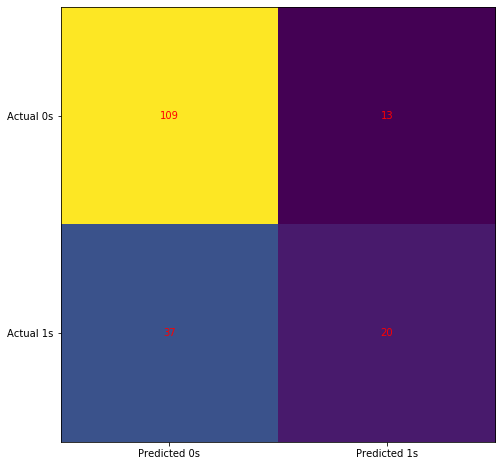

In [305]:
cmv6 = confusion_matrix(y_vali, model6.predict(x1_x5_x6_x7_vali))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cmv6)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cmv6[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
##########################################
######          SCORING             ######
##########################################

In [321]:
#Identify rows with missing values in the test data set

is_NAN = df_test[["Sex", "Fare", "Kid", "kid_siblings"]].isnull()
row_has_NAN = is_NAN.any(axis=1)
rows_with_NaN = df_test[row_has_NAN]

rows_with_NaN

PassengerId  Pclass                Name  Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas    1  60.5      0      0   3701   

     Fare Cabin Embarked  1st_class  2nd_class cabin_area  Kid  kid_siblings  
152   NaN   NaN        S          0          0        NaN    0             0

In [325]:
#Impute the missing values by mean

imp.fit(df_test[["Sex", "Fare", "Kid", "kid_siblings"]])
df_test[["Sex", "Fare", "Kid", "kid_siblings"]] = imp.transform(df_test[["Sex", "Fare", "Kid", "kid_siblings"]])


In [328]:
#Check if ther still is any mising values 
is_NAN = df_test[["Sex", "Fare", "Kid", "kid_siblings"]].isnull()
row_has_NAN = is_NAN.any(axis=1)
rows_with_NaN = df_test[row_has_NAN]

rows_with_NaN

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, 1st_class, 2nd_class, cabin_area, Kid, kid_siblings]
Index: []

In [331]:

x_test = df_test[["Sex", "Fare", "Kid", "kid_siblings"]].to_numpy()

#model.predict(x1_test.reshape(-1,1))
preds = model6.predict(x_test)

In [341]:
df_test["Survived"] = preds

df_test[["PassengerId", "Survived"]].to_csv("D:\\Datasets\\Titanic Machine Learning from Disaster\\kaggle datasets\\submission_log_reg.csv", index=False)

In [340]:
df_test[["PassengerId", "Survived"]]

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]